In [2]:
# Task:
# Turn data into "images"
# Two networks
# GAN: generate atoms and bonds (adjacency) layers
# simple CNN: turning SMILES layer to atoms+bonds layers

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from numpy import ndarray
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler

# loading SMILES data using Chainer Chemistry
from chainer_chemistry.datasets.molnet import get_molnet_dataset
from chainer_chemistry.datasets.numpy_tuple_dataset import NumpyTupleDataset
from chainer_chemistry.dataset.preprocessors import GGNNPreprocessor

from rdkit import Chem
preprocessor = GGNNPreprocessor()

"""Chem.MolFromSmiles('CC1CC(O)C2(CC2)O1')"""

2023-05-19 11:27:56.728389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 11:27:56.789768: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-19 11:27:57.126297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2023-05-19 11:27:57.126341: W tensorflow/compile

"Chem.MolFromSmiles('CC1CC(O)C2(CC2)O1')"

In [3]:
with open('./../data/trainingsets/image.pickle', 'rb') as f:
    X_smiles, SMILES, gap = pickle.load (f)

In [4]:
high_gap = gap[gap >= 9.9]
SMILES_high = SMILES [gap >= 9.9]
X_smiles_high = X_smiles [gap >= 9.9]
print ('total samples >= 9.5(eV):', high_gap.shape[0])

total samples >= 9.5(eV): 861


<Axes: ylabel='Count'>

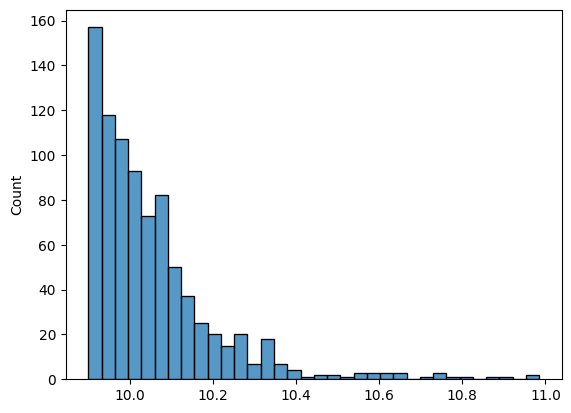

In [5]:
sns.histplot (high_gap)

In [6]:
idx = np.random.choice(len(high_gap), int(len(high_gap) * 0.8), replace = False)
idx_test = np.setdiff1d(list(range(len(high_gap))), idx)
idx_test.shape

(173,)

In [10]:
SMILES_high.shape

(861,)

In [11]:
high_gap.shape

(861,)

In [12]:
# subsampling
idx = np.random.choice(len(high_gap), int(len(high_gap) * 0.8), replace = False)
X_smiles_train, SMILES_train, y_train = (X_smiles_high[idx], 
                                         SMILES_high[idx], 
                                         high_gap[idx])

idx_test = np.setdiff1d(list(range(len(high_gap))), idx)
X_smiles_test, SMILES_test, y_test = (X_smiles_high[idx_test], 
                                      SMILES_high[idx_test], 
                                      high_gap[idx_test])

In [13]:
with open('./../data/trainingsets/highgap_pubqc/image.pickle', 'wb') as f:
    pickle.dump((X_smiles_high, SMILES_high, high_gap), f)
    
with open('./../data/trainingsets/highgap_pubqc/image_train.pickle', 'wb') as f:
    pickle.dump((X_smiles_train, SMILES_train, y_train), f)
    
with open('./../data/trainingsets/highgap_pubqc/image_test.pickle', 'wb') as f:
    pickle.dump((X_smiles_test, SMILES_test, y_test), f)